# Numpy
Content in this notebook follows the content in this [link](https://www.w3schools.com/python/numpy/default.asp)

In [2]:
import numpy as np

## Basic

### Array Slicing

In [6]:
# 1-D Slicing
arr = np.array([1, 2, 3, 4, 5, 6, 7])
print(arr[1:5])
print(arr[1:5:2])
print(arr[::2]) # Every other element (third value is step size)

[2 3 4 5]
[2 4]
[1 3 5 7]


In [3]:
# 2-D Slicing
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(arr[1, 1:4]) # First row, then slicing
print(arr[0:2, 2]) # Both rows, then access second element in both
print(arr[0:5, 2]) # Note how if we specify more rows than exists it doesn't complain
print(arr[0:2, 1:4])

# Summary: The format to access is array[rows, columns], rows and columns can take scalar values (access specific row/column) and also slices.

[7 8 9]
[3 8]
[3 8]
[[2 3 4]
 [7 8 9]]


### Data Types
Below is a list of all data types in NumPy and the characters used to represent them.

- i - integer
- b - boolean
- u - unsigned integer
- f - float
- c - complex float
- m - timedelta
- M - datetime
- O - object
- S - string
- U - unicode string
- V - fixed chunk of memory for other type ( void )

In [4]:
# Check data type of array
arr = np.array([1, 2, 3, 4])
print(arr.dtype) 
print("////////////////////")
# Create array of predefined data type. 
arr = np.array([1, 2, 3, 4], dtype='S')
print(arr)
print(arr.dtype)
arr = np.array([1, 2, 3, 4], dtype='i4') # For i, u, f, S and U we can define size as well. In this case 4 bytes integer.
print(arr)
print(arr.dtype)
print("////////////////////")
# Casting types
arr = np.array([1.1, 2.1, 3.1])
newarr = arr.astype('i')
print(newarr)
print(newarr.dtype)

int64
////////////////////
[b'1' b'2' b'3' b'4']
|S1
[1 2 3 4]
int32
////////////////////
[1 2 3]
int32


### Array Copy and View
Copy is a new array, and the view is just a view of the original array:
- The copy owns the data and any changes made to the copy will not affect original array, and any changes made to the original array will not affect the copy.
- The view does not own the data and any changes made to the view will affect the original array, and any changes made to the original array will affect the view.

In [5]:
arr = np.array([1, 2, 3, 4, 5])
x = arr.copy()
y = arr.view()

# Every NumPy array has the attribute base that returns None if the array owns the data.
print(arr.base) # Returns None
print(x.base) # Returns None
print(y.base) # Returns original data

None
None
[1 2 3 4 5]


### Shape
The shape of an array is the number of elements in each dimension.

In [6]:
# 1D
arr = np.array([1, 2, 3, 4])
print(arr)
print('Shape of array :', arr.shape)
print("/////////////")
# 2D
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr)
print('Shape of array :', arr.shape)
print("/////////////")
# 3D
arr = np.array([[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]], [[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]])
print(arr)
print('Shape of array :', arr.shape)
print("/////////////")
# 4D
arr = np.array([[[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]], [[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]]])
print(arr)
print('Shape of array :', arr.shape)
print("/////////////")
# 5D
arr = np.array([1, 2, 3, 4], ndmin=5)
print(arr)
print('Shape of array :', arr.shape)

[1 2 3 4]
Shape of array : (4,)
/////////////
[[1 2 3 4]
 [5 6 7 8]]
Shape of array : (2, 4)
/////////////
[[[1 2 3 4]
  [1 2 3 4]
  [1 2 3 4]]

 [[1 2 3 4]
  [1 2 3 4]
  [1 2 3 4]]]
Shape of array : (2, 3, 4)
/////////////
[[[[1 2 3 4]
   [1 2 3 4]
   [1 2 3 4]]]


 [[[1 2 3 4]
   [1 2 3 4]
   [1 2 3 4]]]]
Shape of array : (2, 1, 3, 4)
/////////////
[[[[[1 2 3 4]]]]]
Shape of array : (1, 1, 1, 1, 4)


### Reshaping
By reshaping we can add or remove dimensions or change number of elements in each dimension.
**Can We Reshape Into any Shape?** Yes, as long as the elements required for reshaping are equal in both shapes.

**Note:** There are a lot of functions for changing the shapes of arrays in numpy flatten, ravel and also for rearranging the elements rot90, flip, fliplr, flipud etc. These fall under Intermediate to Advanced section of numpy.

In [7]:
# Reshape From 1-D to 2-D
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print("Current Shape: ", arr.shape)
newarr = arr.reshape(4, 3) # 4x3=12
print("New Shape: ", newarr.shape)
print(newarr)
print("//////////////////")
# Reshape From 1-D to 3-D
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print("Current Shape: ", arr.shape)
newarr = arr.reshape(4, 1, 3)  # 4x1x3=12
print("New Shape: ", newarr.shape)
print(newarr)
print("//////////////////") 
# IMPORTANT: Reshaping returns a view!
print(newarr.base)
print("//////////////////") 
# Unknown dimension. You do not have to specify an exact number for one of the dimensions in the reshape method. 
# Pass -1 as the value, and NumPy will calculate this number for you.
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
newarr = arr.reshape(2, 2, -1)
print(newarr)
print("//////////////////") 
# Flattening array
arr = np.array([[1, 2, 3], [4, 5, 6]])
newarr = arr.reshape(-1)
print(newarr)

Current Shape:  (12,)
New Shape:  (4, 3)
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
//////////////////
Current Shape:  (12,)
New Shape:  (4, 1, 3)
[[[ 1  2  3]]

 [[ 4  5  6]]

 [[ 7  8  9]]

 [[10 11 12]]]
//////////////////
[ 1  2  3  4  5  6  7  8  9 10 11 12]
//////////////////
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
//////////////////
[1 2 3 4 5 6]



### NumPy Array Iterating
Instead of using for loops to iterate through each dimension one by one, we can use nditer(). Its a helping function that can be used from very basic to very advanced iterations. 

In [8]:
# 3D Array
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

for x in np.nditer(arr): # Note how no nested loops are necessary
  print(x)
print("///////////////")
# Casting datatypes while looping. We can use op_dtypes argument and pass it the expected datatype to change the datatype of elements 
# while iterating.NumPy does not change the data type of the element in-place (where the element is in array) so it needs some other 
# space to perform this action, that extra space is called buffer, and in order to enable it in nditer() we pass flags=['buffered'].
arr = np.array([1, 2, 3])

for x in np.nditer(arr, flags=['buffered'], op_dtypes=['S']):
  print(x)

print("///////////////")
# Sometimes we require corresponding index of the element while iterating, the ndenumerate() method can be used for those usecases.
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

for idx, x in np.ndenumerate(arr):
  print(idx, x)

1
2
3
4
5
6
7
8
///////////////
np.bytes_(b'1')
np.bytes_(b'2')
np.bytes_(b'3')
///////////////
(0, 0, 0) 1
(0, 0, 1) 2
(0, 1, 0) 3
(0, 1, 1) 4
(1, 0, 0) 5
(1, 0, 1) 6
(1, 1, 0) 7
(1, 1, 1) 8


### NumPy Joining Array
In NumPy we join arrays by axes. We pass a sequence of arrays that we want to join to the concatenate() function, along with the axis. If axis is not explicitly passed, it is taken as 0.

In [9]:
# Join two arrays along
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.concatenate((arr1, arr2))
print(arr)
print("////////////////")
# Join two arrays along axis 1 (rows)
arr1 = np.array([[1, 2], [3, 4]])  # 1, 2 | 5, 6 -> 1 2 5 6
arr2 = np.array([[5, 6], [7, 8]])  # 3, 4 | 7, 8 -> 3 4 7 8
arr = np.concatenate((arr1, arr2), axis=1)
print(arr)
print("////////////////")
# Join using stack function. Stacking is same as concatenation, the only difference is that stacking is done along a new axis. We can concatenate 
# two 1-D arrays along the second axis which would result in putting them one over the other, ie. stacking.
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.stack((arr1, arr2), axis=1)
print(arr)
print("////////////////")
# NumPy provides a helper function: hstack() to stack along rows.
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.hstack((arr1, arr2))
print(arr)
print("////////////////")
# NumPy provides a helper function: vstack()  to stack along columns.
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.vstack((arr1, arr2))
print(arr)
print("////////////////")
# NumPy provides a helper function: dstack() to stack along height, which is the same as depth.
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.dstack((arr1, arr2))
print(arr)


[1 2 3 4 5 6]
////////////////
[[1 2 5 6]
 [3 4 7 8]]
////////////////
[[1 4]
 [2 5]
 [3 6]]
////////////////
[1 2 3 4 5 6]
////////////////
[[1 2 3]
 [4 5 6]]
////////////////
[[[1 4]
  [2 5]
  [3 6]]]


### NumPy Splitting Array
Splitting is reverse operation of Joining. We use array_split() for splitting arrays, we pass it the array we want to split and the number of splits.

**Note:** We also have the method split() available but it will not adjust the elements when elements are less in source array for splitting like in example above, array_split() worked properly but split() would fail.

**Note:** The return value of the array_split() method is an array containing each of the split as an array.

In [10]:
# Split array 1D
arr = np.array([1, 2, 3, 4, 5, 6])
newarr = np.array_split(arr, 3)
print(newarr)
print("////////////////")
# Split array 2D
arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
newarr = np.array_split(arr, 3)
print(newarr)
# Uneven split
arr = np.array([1, 2, 3, 4, 5, 6])
newarr = np.array_split(arr, 4)
print(newarr)
print("////////////////")
# Oversplit
arr = np.array([1, 2, 3, 4, 5, 6])
newarr = np.array_split(arr, 10)
print(newarr)
print("////////////////")
# In addition, you can specify which axis you want to do the split around.
arr = np.array([[1, 2, 3], 
                [4, 5, 6], 
                [7, 8, 9], 
                [10, 11, 12], 
                [13, 14, 15], 
                [16, 17, 18]])
newarr = np.array_split(arr, 3, axis=1)
print(newarr)

[array([1, 2]), array([3, 4]), array([5, 6])]
////////////////
[array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]]), array([[ 9, 10],
       [11, 12]])]
[array([1, 2]), array([3, 4]), array([5]), array([6])]
////////////////
[array([1]), array([2]), array([3]), array([4]), array([5]), array([6]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64)]
////////////////
[array([[ 1],
       [ 4],
       [ 7],
       [10],
       [13],
       [16]]), array([[ 2],
       [ 5],
       [ 8],
       [11],
       [14],
       [17]]), array([[ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18]])]


In [11]:
# An alternate solution is using hsplit() opposite of hstack(). Note: Similar alternates to vstack() and dstack() are available as vsplit() and dsplit()
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])
newarr = np.hsplit(arr, 3)
print(newarr)


[array([[ 1],
       [ 4],
       [ 7],
       [10],
       [13],
       [16]]), array([[ 2],
       [ 5],
       [ 8],
       [11],
       [14],
       [17]]), array([[ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18]])]


### NumPy Searching Arrays
You can search an array for a certain value, and return the indexes that get a match.

In [12]:
# Search array
arr = np.array([1, 2, 3, 4, 5, 4, 4])
x = np.where(arr == 4) # Returns indexes of matches
print(x)
print("////////////////")
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x = np.where(arr%2 == 0)
print(x)
print("////////////////")
# There is a method called searchsorted() which performs a
# binary search in the array, and returns the index where the specified 
# value would be inserted to maintain the search order. 
# It is assumed to be used on sorted arrays.
arr = np.array([6, 7, 8, 9])
x = np.searchsorted(arr, 7) # The number 7 should be inserted on index 1 to remain the sort order. It returns the first index where the number 7 is no longer larger than the next value.
print(x)
print("////////////////")
# Search from right side
arr = np.array([6, 7, 8, 9])
x = np.searchsorted(arr, 7, side='right') # Find the indexes where the value 7 should be inserted, starting from the right
print(x)
print("////////////////")
# Search for multiple values
arr = np.array([1, 3, 5, 7])
x = np.searchsorted(arr, [2, 4, 6])
print(x)

(array([3, 5, 6]),)
////////////////
(array([1, 3, 5, 7]),)
////////////////
1
////////////////
2
////////////////
[1 2 3]


### NumPy Sorting Arrays
The NumPy ndarray object has a function called sort(), that will sort a specified array.

**Note:** This method returns a copy of the array, leaving the original array unchanged.

In [13]:
# Sort Array 1D 
arr = np.array([3, 2, 0, 1])
print(np.sort(arr))
print("////////////////")
# Sort Array 2D 
arr = np.array([[3, 2, 4], [5, 0, 1]])
print(np.sort(arr))
print("////////////////")

[0 1 2 3]
////////////////
[[2 3 4]
 [0 1 5]]
////////////////


### NumPy Filter Array
Getting some elements out of an existing array and creating a new array out of them is called filtering. In NumPy, you filter an array using a boolean index list (similar to pandas).

In [14]:
# Boolean indexing example
arr = np.array([41, 42, 43, 44])
x = [True, False, True, False]
newarr = arr[x]
print(newarr)
print("////////////////")
# The common use is to create a filter array based on conditions.
arr = np.array([41, 42, 43, 44])
filter_arr = []
for element in arr:
  if element > 42:
    filter_arr.append(True)
  else:
    filter_arr.append(False)
newarr = arr[filter_arr]
print(filter_arr)
print(newarr)
print("////////////////")
# Or using a more concise form
arr = np.array([41, 42, 43, 44])
filter_arr = arr > 42
newarr = arr[filter_arr]
print(filter_arr)
print(newarr)

[41 43]
////////////////
[False, False, True, True]
[43 44]
////////////////
[False False  True  True]
[43 44]


## Random
Computers work on programs, and programs are definitive set of instructions. So it means there must be some algorithm to generate a random number as well.

If there is a program to generate random number it can be predicted, thus it is not truly random.

Random numbers generated through a generation algorithm are called pseudo random.

Can we make truly random numbers?

Yes. In order to generate a truly random number on our computers we need to get the random data from some outside source. This outside source is generally our keystrokes, mouse movements, data on network etc.

**Numpy random features focuses on creating pseudo random numbers**

In [37]:
! pip install seaborn

In [38]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Generate a random integer from 0 to 100
x = random.randint(100)
print(x)

# Generate a random float from 0 to 1:
x = random.rand()
print(x)

3
0.6099879266578385


### Data Distributions
We can generate random numbers based on defined probabilities using the choice() method of the random module.

The choice() method allows us to specify the probability for each value.

In [20]:
x = random.choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(100))
print(x)

[5 7 7 5 5 7 5 7 5 5 7 7 7 5 7 3 7 3 7 3 3 5 3 5 7 7 7 5 5 5 7 3 5 7 7 7 7
 7 7 7 7 5 7 5 7 5 7 5 5 3 7 5 7 7 7 7 7 5 7 7 5 7 7 7 7 7 7 7 5 7 7 5 5 5
 3 7 7 7 7 3 3 7 3 5 3 5 7 5 5 7 5 7 7 5 7 7 7 3 5 5]


In [21]:
x = random.choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(3, 5))
print(x)

[[7 5 3 3 7]
 [7 7 7 7 5]
 [5 3 5 7 7]]


### Permutation
A permutation refers to an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa.
The NumPy Random module provides two methods for this: shuffle() and permutation().

In [29]:
arr = np.array([1, 2, 3, 4, 5])
random.shuffle(arr) # The shuffle() method makes changes to the original array.
print(arr)

arr = np.array([1, 2, 3, 4, 5]) # The permutation() method returns a re-arranged array (and leaves the original array un-changed).
print(random.permutation(arr))

[1 5 4 3 2]
[3 2 5 4 1]


### Distributions

In [31]:
# Normal Distributions
x = random.normal(size=(2, 3))
print(x)

x = random.normal(loc=1, scale=2, size=(2, 3)) # Size 2x3 with mean at 1 and standard deviation of 2
print(x)

[[ 2.66473303  0.27974677  0.3387586 ]
 [ 1.54722058 -0.2500133  -0.31332689]]
[[-1.00789882  0.32381461  0.74122592]
 [-0.05845998 -0.30847282 -0.69474511]]


[7 5 8 7 4 3 7 7 4 5]


/tmp/ipykernel_89693/2978785799.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(loc=50, scale=5, size=1000), hist=False, label='normal')
/tmp/ipykernel_89693/2978785799.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=100, p=0.5, size=10

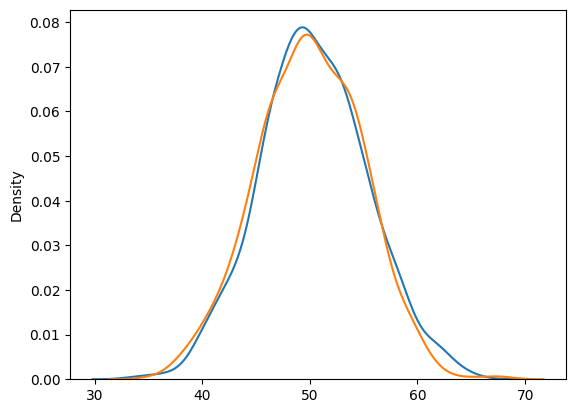

In [39]:
# Binomial Distribution
# n - number of trials.
# p - probability of occurence of each trial (e.g. for toss of a coin 0.5 each).
# size - The shape of the returned array.

x = random.binomial(n=10, p=0.5, size=10)
print(x)

# Difference Between Normal and Binomial Distribution
# The main difference is that normal distribution is continous whereas binomial is 
# discrete, but if there are enough data points it will be quite similar to normal 
# distribution with certain loc and scale.
sns.distplot(random.normal(loc=50, scale=5, size=1000), hist=False, label='normal')
sns.distplot(random.binomial(n=100, p=0.5, size=1000), hist=False, label='binomial')

plt.show()

[2 2 5 3 3 2 3 1 0 2]


/tmp/ipykernel_89693/2053589733.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=2, size=1000), kde=False)


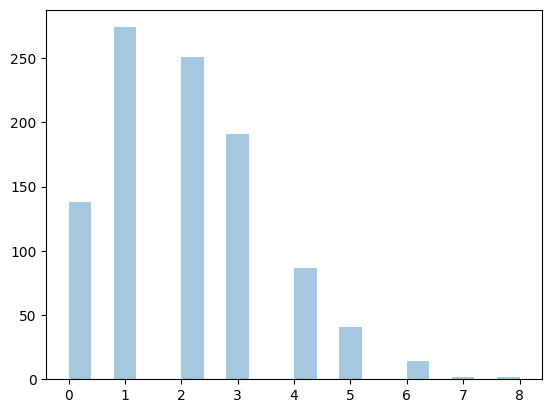

/tmp/ipykernel_89693/2053589733.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')
/tmp/ipykernel_89693/2053589733.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=50, size=1000), hi

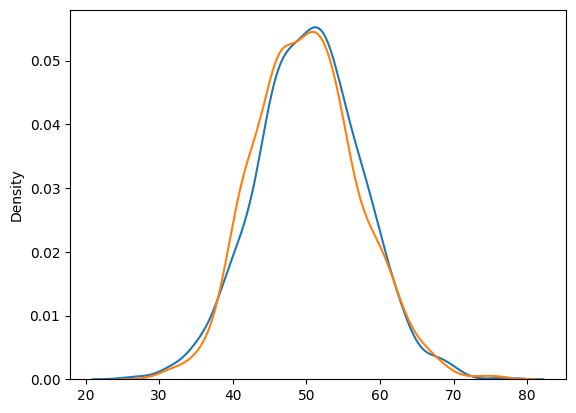

/tmp/ipykernel_89693/2053589733.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=1000, p=0.01, size=1000), hist=False, label='binomial')
/tmp/ipykernel_89693/2053589733.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=10, size=1000),

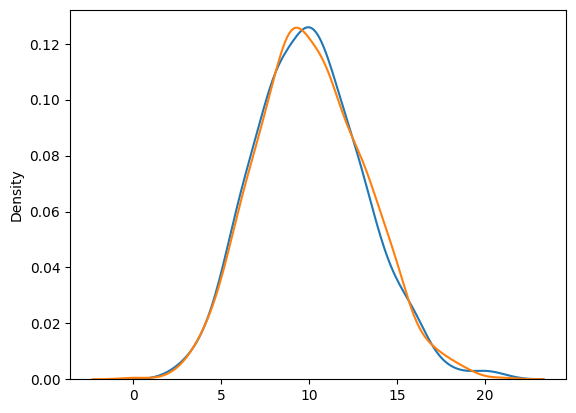

In [44]:
# Poisson Distribution
# Poisson Distribution is a Discrete Distribution. It estimates how many times an event can happen 
# in a specified time. e.g. If someone eats twice a day what is the probability he will eat thrice?
# lam - rate or known number of occurrences e.g. 2 for above problem.
# size - The shape of the returned array.
x = random.poisson(lam=2, size=10)
print(x)
sns.distplot(random.poisson(lam=2, size=1000), kde=False)
plt.show()

# Normal distribution is continuous whereas poisson is discrete. But we can see that similar to 
# binomial for a large enough poisson distribution it will become similar to normal distribution 
# with certain std dev and mean.
sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')
sns.distplot(random.poisson(lam=50, size=1000), hist=False, label='poisson')
plt.show()

# Binomial distribution only has two possible outcomes, whereas poisson distribution can have 
# unlimited possible outcomes. But for very large n and near-zero p binomial distribution is near 
# identical to poisson distribution such that n * p is nearly equal to lam.
sns.distplot(random.binomial(n=1000, p=0.01, size=1000), hist=False, label='binomial')
sns.distplot(random.poisson(lam=10, size=1000), hist=False, label='poisson')
plt.show()

[[0.07211018 0.12349551 0.24704491]
 [0.45774389 0.75087138 0.20398851]]


/tmp/ipykernel_89693/1787042667.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.uniform(size=1000), hist=False)


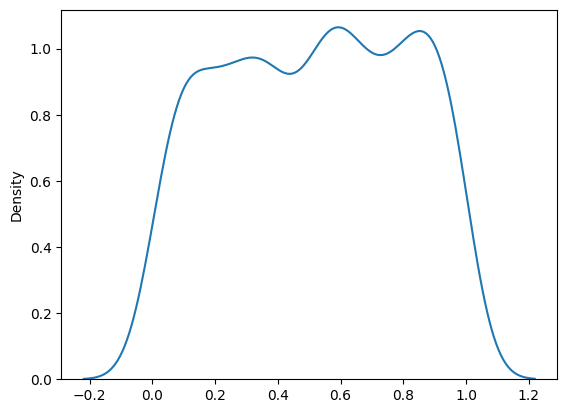

In [46]:
# Uniform Distribution
# Used to describe probability where every event has equal chances of occuring. E.g. Generation of random numbers.
# It has three parameters:
# a - lower bound - default 0 .0.
# b - upper bound - default 1.0.
# size - The shape of the returned array.
x = random.uniform(size=(2, 3))
print(x)

sns.distplot(random.uniform(size=1000), hist=False)
plt.show()

[[-0.13269467  9.63247473  3.8077158 ]
 [ 1.41378859  2.02025708 -1.25294638]]


/tmp/ipykernel_89693/3276444124.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.logistic(size=1000), hist=False)


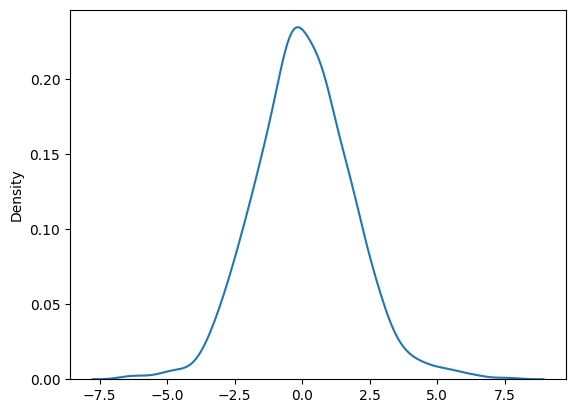

/tmp/ipykernel_89693/3276444124.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(scale=2, size=1000), hist=False, label='normal')
/tmp/ipykernel_89693/3276444124.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.logistic(size=1000), hist=False, label

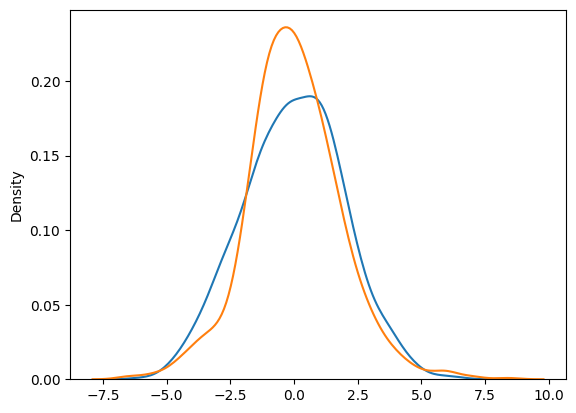

In [50]:
# Logistic Distribution
# Logistic Distribution is used to describe growth.
# Used extensively in machine learning in logistic regression, neural networks etc.
# It has three parameters:
# loc - mean, where the peak is. Default 0.
# scale - standard deviation, the flatness of distribution. Default 1.
# size - The shape of the returned array.

x = random.logistic(loc=1, scale=2, size=(2, 3))
print(x)

sns.distplot(random.logistic(size=1000), hist=False)
plt.show()

# Both distributions are near identical, but logistic distribution 
# has more area under the tails, meaning it represents more possibility of
#  occurrence of an event further away from mean. For higher value of scale 
# (standard deviation) the normal and logistic distributions are near identical 
# apart from the peak.
sns.distplot(random.normal(scale=2, size=1000), hist=False, label='normal')
sns.distplot(random.logistic(size=1000), hist=False, label='logistic')
plt.show()

In [ ]:
# Multinomial Distribution
# Multinomial distribution is a generalization of binomial distribution.
# It describes outcomes of multi-nomial scenarios unlike binomial where 
# scenarios must be only one of two. e.g. Blood type of a population, dice roll outcome.
# It has three parameters:
# n - number of possible outcomes (e.g. 6 for dice roll).
# pvals - list of probabilties of outcomes (e.g. [1/6, 1/6, 1/6, 1/6, 1/6, 1/6] for dice roll).
# size - The shape of the returned array.
x = random.multinomial(n=6, pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
print(x)

[[2.44072591 3.36957977 3.3384415 ]
 [0.09896395 0.57637615 4.49474071]]


/tmp/ipykernel_89693/182731734.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.exponential(size=1000), hist=False)


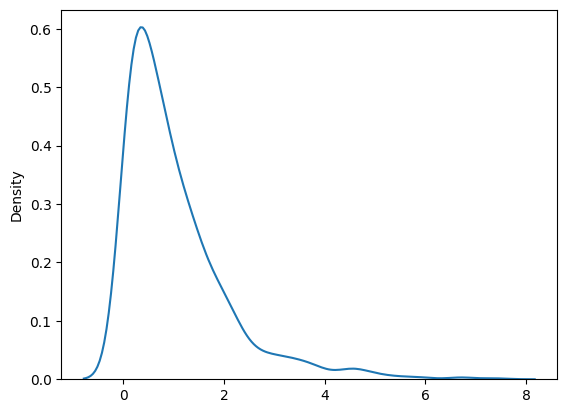

In [53]:
# Exponential Distribution
# Exponential distribution is used for describing time till next event e.g. failure/success etc.
# It has two parameters:
# scale - inverse of rate ( see lam in poisson distribution ) defaults to 1.0.
# size - The shape of the returned array.

x = random.exponential(scale=2, size=(2, 3))
print(x)


sns.distplot(random.exponential(size=1000), hist=False)
plt.show()

# Poisson distribution deals with number of occurences of an event in a time period 
# whereas exponential distribution deals with the time between these events.

[[3.43834362 1.48052441 1.20290771]
 [1.02362522 0.25868464 0.23117379]]


/tmp/ipykernel_89693/2365661731.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.chisquare(df=1, size=1000), hist=False)


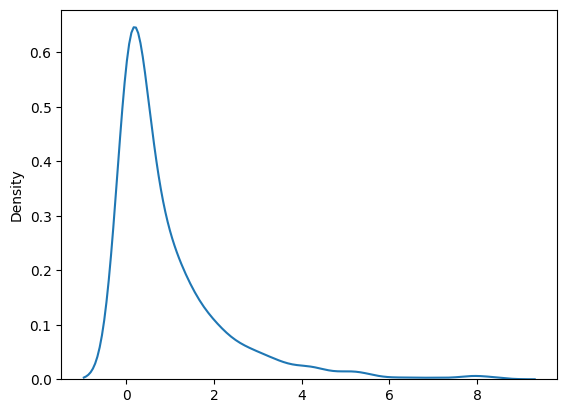

In [55]:
# Chi Square Distribution
# Chi Square distribution is used as a basis to verify the hypothesis.
# It has two parameters:
# df - (degree of freedom).
# size - The shape of the returned array.
x = random.chisquare(df=2, size=(2, 3))
print(x)

sns.distplot(random.chisquare(df=1, size=1000), hist=False)
plt.show()

[[4.08344963e-04 1.38786221e+00 1.90548248e-02]
 [6.22182194e-02 4.66403613e-01 6.85604693e-01]]


/tmp/ipykernel_89693/1902895297.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.pareto(a=2, size=1000), kde=False)


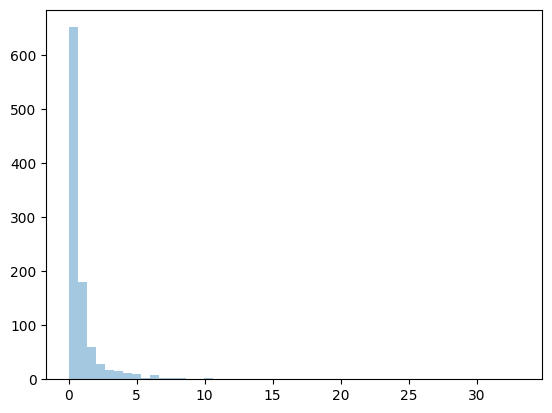

In [58]:
# A distribution following Pareto's law i.e. 80-20 distribution (20% factors cause 80% outcome).
# It has two parameter:
# a - shape parameter.
# size - The shape of the returned array.
x = random.pareto(a=2, size=(2, 3))
print(x)

sns.distplot(random.pareto(a=2, size=1000), kde=False)
plt.show()

## NumPy ufuncs
Converting iterative statements into a vector based operation is called vectorization. ufuncs are used to implement vectorization in NumPy which is way faster than iterating over elements.

#### How To Create Your Own ufunc
To create your own ufunc, you have to define a function, like you do with normal functions in Python, then you add it to your NumPy ufunc library with the frompyfunc() method.

The frompyfunc() method takes the following arguments:

function - the name of the function.
inputs - the number of input arguments (arrays).
outputs - the number of output arrays.

In [60]:
def myadd(x, y):
  return x+y

myadd = np.frompyfunc(myadd, 2, 1)
print(myadd([1, 2, 3, 4], [5, 6, 7, 8]))
print(type(np.add)) # Check the type of a function to check if it is a ufunc or not.

[6 8 10 12]
<class 'numpy.ufunc'>


#### Arithmetic Operations

In [62]:
# Summations
# Add
arr1 = np.array([1, 2, 3])
arr2 = np.array([1, 2, 3])
newarr = np.add(arr1, arr2)
print(newarr)

# Sum
arr1 = np.array([1, 2, 3])
arr2 = np.array([1, 2, 3])
newarr = np.sum([arr1, arr2])
print(newarr)

# Sum over Axis
arr1 = np.array([1, 2, 3])
arr2 = np.array([1, 2, 3])
newarr = np.sum([arr1, arr2], axis=1)
print(newarr)

# Cumulative Sum
arr = np.array([1, 2, 3])
newarr = np.cumsum(arr)
print(newarr)

[2 4 6]
12
[6 6]
[1 3 6]


In [65]:
# Product
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])
x = np.prod([arr1, arr2])
print(x)

# Product over Axis
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])
newarr = np.prod([arr1, arr2], axis=1)
print(newarr)

# Cumulative Product
arr = np.array([5, 6, 7, 8])
newarr = np.cumprod(arr)
print(newarr)

40320
[  24 1680]
[   5   30  210 1680]


In [67]:
# Differences
# Descrete Differences: A discrete difference means subtracting two successive elements. E.g. for [1, 2, 3, 4], the discrete difference would be [2-1, 3-2, 4-3] = [1, 1, 1]
arr = np.array([10, 15, 25, 5])
newarr = np.diff(arr)
print(newarr)

# We can perform this operation repeatedly by giving parameter n. E.g. for [1, 2, 3, 4], the discrete difference with n = 2 would be [2-1, 3-2, 4-3] = [1, 1, 1] , 
# then, since n=2, we will do it once more, with the new result: [1-1, 1-1] = [0, 0]
arr = np.array([10, 15, 25, 5])
newarr = np.diff(arr, n=2)
print(newarr)


[  5  10 -20]
[  5 -30]


In [72]:
# Sets
# We can use NumPy's unique() method to find unique elements from any array. E.g. create a set array, but remember that the set arrays should only be 1-D arrays.
arr = np.array([1, 1, 1, 2, 3, 4, 5, 5, 6, 7])
x = np.unique(arr)
print(x)

# Union
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([3, 4, 5, 6])
newarr = np.union1d(arr1, arr2)
print(newarr)

# Intresection
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([3, 4, 5, 6])
newarr = np.intersect1d(arr1, arr2, assume_unique=True)
print(newarr)

# Difference
set1 = np.array([1, 2, 3, 4])
set2 = np.array([3, 4, 5, 6])
newarr = np.setdiff1d(set1, set2, assume_unique=True)
print(newarr)

# Symmetric Difference
set1 = np.array([1, 2, 3, 4])
set2 = np.array([3, 4, 5, 6])
newarr = np.setxor1d(set1, set2, assume_unique=True)
print(newarr)

[1 2 3 4 5 6 7]
[1 2 3 4 5 6]
[3 4]
[1 2]
[1 2 5 6]


### Matrix Operations

In [76]:
import numpy as np

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print("2-D arrays - both functions give the same result")
print(np.dot(a, b))
print(np.matmul(a, b))
print(a @ b) 

print("Scalar multiplication - only dot allows it. print(np.matmul(a, 2))  # Raises ValueError")
print(np.dot(a, 2)) 

print("Higher-dimensional arrays")
a = np.ones((2, 3, 4))
b = np.ones((2, 4, 5))

print(np.dot(a, b).shape) 
print(np.matmul(a, b).shape) 

2-D arrays - both functions give the same result
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
Scalar multiplication - only dot allows it. print(np.matmul(a, 2))  # Raises ValueError
[[2 4]
 [6 8]]
Higher-dimensional arrays
(2, 3, 2, 5)
(2, 3, 5)
